In [4]:
import signac
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from tqdm import tqdm

project = signac.get_project()

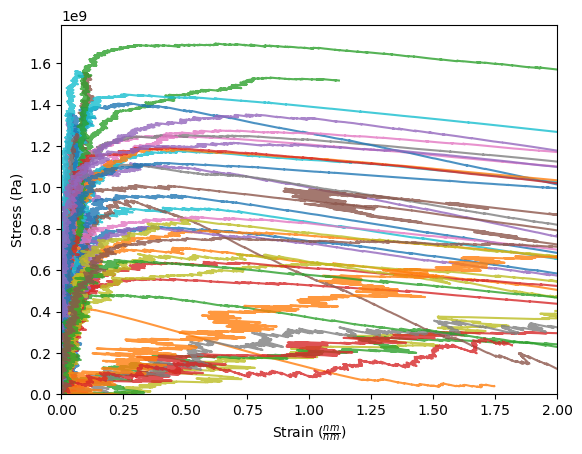

(10000000.0, 100000000000.0)

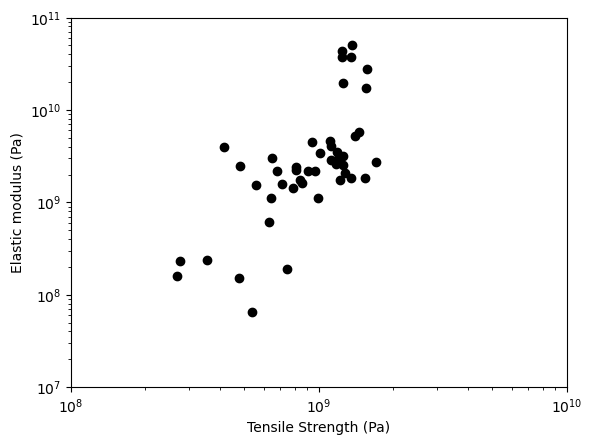

In [ ]:
for job in project:
    if 'stress' in job.doc:
        try:
            if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0:
            # if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0):
                continue
            stress = np.array(job.doc.get('stress'))
            plt.plot(np.array(job.doc['strain']), np.array(stress), label=job.sp.pdbID, alpha=.8)
        except:
            print(f'Error in {job.sp.pdbID}')
plt.xlabel('Strain $(\\frac{nm}{nm})$')
plt.ylabel('Stress (Pa)')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0)
plt.xlim(0,2)
plt.show()
plt.close()

# Ashby plot
for job in project:
    if 'stress' in job.doc:
        try:
            if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0:
                continue
            plt.scatter(np.array(job.doc['ultimate_tensile_strength']), np.array(job.doc['elastic_modulus']), label=job.sp.pdbID, edgecolors='k', color = 'black')
        except:
            print(f'Error in {job.sp.pdbID}')
plt.xlabel('Tensile Strength (Pa)')
plt.ylabel('Elastic modulus (Pa)')
plt.yscale('log')
plt.xscale('log')
plt.xlim(1e8, 1e10)
plt.ylim(1e7, 1e11)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

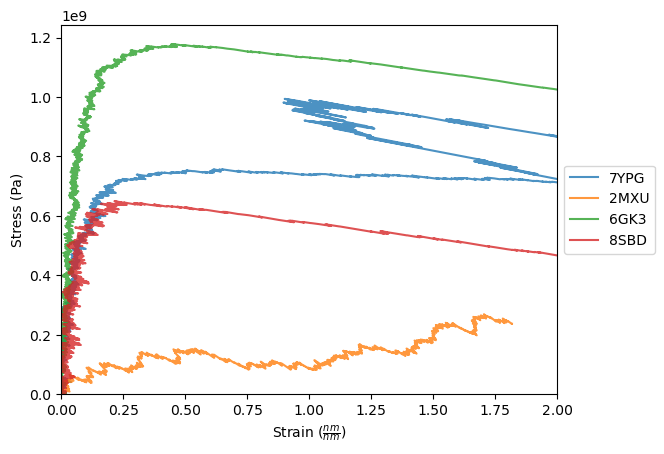

In [5]:
sub = project.find_jobs({"sp.pdbID": {"$in": ['2MXU', '7YPG', '6GK3', '8SBD', '2N0A']}})

for job in sub:
    if 'stress' in job.doc:
        try:
            if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0) or sum(np.array(job.doc.get('strain')) > 40.0) > 0:
            # if np.isclose(job.doc.get('ultimate_tensile_strength'), 0.0):
                continue
            stress = np.array(job.doc.get('stress'))
            plt.plot(np.array(job.doc['strain']), np.array(stress), label=job.sp.pdbID, alpha=.8)
        except:
            print(f'Error in {job.sp.pdbID}')
plt.xlabel('Strain $(\\frac{nm}{nm})$')
plt.ylabel('Stress (Pa)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0)
plt.xlim(0,2)
plt.show()
plt.close()

In [6]:
def find_linear_region(strain, stress, window_size=500):
    best_r_squared = -1
    best_start = 0
    best_end = 0
    
    # Start with the first window
    start = 0
    end = min(window_size, len(strain))
    
    while end <= len(strain):
        subset_strain = strain[start:end]
        subset_stress = stress[start:end]
        
        # Calculate linear regression
        slope, intercept, r_value, p_value, std_err = linregress(subset_strain, subset_stress)
        
        if r_value**2 > best_r_squared:
            best_r_squared = r_value**2
            best_start = start
            best_end = end
        
        # Move the window
        start += 1
        end += 1
    
    return best_start, best_end

sub = project.find_jobs({"sp.pdbID": {"$in": ['2MXU', '7YPG', '6GK3', '8SBD', '2N0A']}})
for job in sub:
    if 'stress' in job.doc:
        try:
            # Find the linear region with the highest R-squared value
            linear_region_start, linear_region_end = find_linear_region(job.doc['strain'], job.doc['stress'])
            linear_strain = job.doc['strain'][linear_region_start:linear_region_end]
            linear_stress = job.doc['stress'][linear_region_start:linear_region_end]
            slope, intercept, r_value, p_value, std_err = linregress(linear_strain, linear_stress)
            elastic_modulus = slope
            print(slope)
            print(linear_strain)
            print(intercept)
            plt.plot(linear_strain, slope * linear_strain + intercept, color='red', label=job.sp.pdbID)
            plt.plot(job.doc['strain'], job.doc['stress'], label=job.sp.pdbID, alpha=.8)
        except Exception as e:
            print(f'Error in {job.sp.pdbID}')
            print(e)

plt.xlabel('Strain $(\\frac{nm}{nm})$')
plt.ylabel('Stress (Pa)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0)
plt.xlim(0,2)
plt.show()
plt.close()

-130687978.95476504
[0.9395665790245052, 0.950806520929433, 0.9142987488401924, 1.0376736405731046, 1.0541412574189126, 1.0193877978309114, 0.9674746936013875, 0.9443688993011401, 0.912879430685923, 0.922415750023692, 0.9349053089992264, 0.9438245334873132, 0.9442080138581872, 0.9516550263477462, 0.9511393113662259, 0.9548308609134325, 0.9653148616274995, 0.9812557439409, 0.9987900533125872, 1.0127914946698433, 1.0324084991592082, 1.0853243825194658, 1.047589032461393, 1.0162273906364672, 1.0685570338895267, 1.0697824079481817, 1.081141361002691, 0.9925816383427477, 0.9944086798798428, 1.0195993732079456, 0.9003612208780819, 0.9095272833060415, 0.9207584095702597, 0.9386387328398043, 0.9511679621985327, 1.0646406855042214, 1.1177042308463676, 1.0351479595097621, 1.0477146553415069, 1.0656632998265523, 1.081524841373565, 1.155305142383617, 1.0666462437656892, 1.091127278016657, 1.1430998878209722, 1.1018140384670483, 1.0150262595897641, 1.1274102512677993, 1.1536918801337332, 1.17527918

KeyboardInterrupt: 

In [11]:
# project.find_jobs({'sp.pdbID': '2MXU'})
subdf = project.find_jobs({"sp.pdbID": {"$in": ['2MXU', '7YPG', '6GK3', '8SBD', '2N0A']}}).to_dataframe()
subdf[['sp.pdbID', 'doc.cross_sectional_area',	'doc.strain',	'doc.stress',	'doc.ultimate_tensile_strength',	'doc.elastic_modulus']]

,sp.pdbID,doc.cross_sectional_area,doc.strain,doc.stress,doc.ultimate_tensile_strength,doc.elastic_modulus
d7b6994410258a7b44a7413918121b23,7YPG,2.887518e-18,"[0.0, -0.0030612312364597907, -0.0060541412574...","[-3.9531175608993903, 827631.0675740374, 16442...",9.937495e+08,1.103723e+09
287a2667ba6ba59a7771e2a9290e6158,7YPG,3.976711e-18,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[-0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0....",-0.000000e+00,NaN
07415455550d81f0c964dcffb616c3bd,2MXU,3.209906e-18,"[0.0, -0.00027007677896988703, -0.001101741780...","[12.086460808061974, 506176.856402216, 1424272...",2.693182e+08,1.581047e+08
099d5a5060eb8ed287e34d92fcd38833,2N0A,NaN,NaN,NaN,NaN,NaN
b8a40eda316ba93a180a8dea040194a0,2N0A,NaN,NaN,NaN,NaN,NaN
0f4622e9043503546a159d072383fc97,6GK3,3.009287e-18,"[0.0, -0.00030133667246939595, 0.0012521760376...","[-0.2154058235344319, 381502.29661734874, 4601...",1.177887e+09,2.601217e+09
a0e92bcac086dca031f497c0b2916e7c,8SBD,2.847113e-18,"[0.0, -0.011788151930391268, -0.00592881085117...","[-1.7516377476093952, 2258417.8347772527, 1661...",6.495844e+08,3.036003e+09


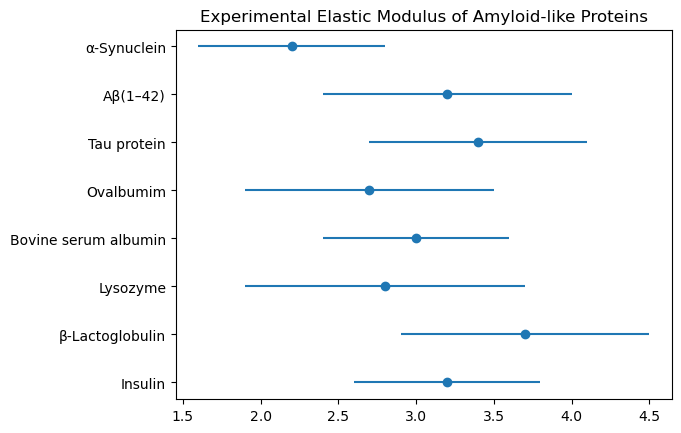

In [17]:
# experimental reports on similar β-sheet structures find the elastic modulus in the range of 10–30 GPa and the strength on the order of 100 MPa
simulated_results = [ # Tensile deformation and failure of amyloid and amyloid-like protein fibrils
    ['stacked aBeta (1-40)', 7.85, 5.46, 13.0, 242.6], # inital length (nm), cross-sectional area (nm2) Young’s modulus  (GPa) Ultimate tensile strength (MPa)
    ['Iowa mutant aBeta', 6.96, 3.64, 11.7, 402.3],
    ['Helical YadA CBP', 3.52, 1.40, 12.6, 553.7],
    ['LpIBP', 3.74, 1.89, 26.9, 693.4],
    ['GlmU C-terminus', 5.37, 2.20, 23.3, 629.8],
    ['Mixed HET-s prion', 5.38, 2.10, 9.8, 917.0],
]
experimental_results = [ # elastic modulus (GPa), certainty https://doi-org.proxy.library.vanderbilt.edu/10.1039/C2NR30768E
    ['Insulin', 3.2, 0.6], #8SBD  3dbf2ff171970a0eb7fc96b2b2025de7
    ['β-Lactoglobulin', 3.7, 0.8], #6GK3
    ['Lysozyme', 2.8, 0.9],
    ['Bovine serum albumin', 3.0, 0.6],
    ['Ovalbumim', 2.7, 0.8],
    ['Tau protein', 3.4, 0.7], #7YPG for (297-391) 7NRS
    ['Aβ(1–42)', 3.2, 0.8], # 2MXU
    ['α-Synuclein', 2.2, 0.6], #2N0A 7WO0
]
# plot with error bars and x axis text vertical
plt.title('Experimental Elastic Modulus of Amyloid-like Proteins')
plt.errorbar([e[1] for e in experimental_results], [e[0] for e in experimental_results], xerr=[e[2] for e in experimental_results], fmt='o')
# plt.plot([e[0] for e in experimental_results], [e[1] for e in experimental_results])

experimental_results = [  # elastic modulus (GPa), certainty
    ['α-Synuclein', 1.4, .4] #  https://doi.org/10.1002/polb.23428

]
experiment_results = [ # Tensile strength (GPa), uncertainty https://doi.org/10.1016/j.polymer.2013.02.029
    ['hiPP', 0.6, .4] # two prototfibrils
]
experimental = [ #fracture force (pN), uncertainty https://doi.org/10.1016/j.polymer.2013.02.029
    ['Aβ(1–42)', 23],
    ['Aβ(1–40)', 33],
]

2N0A not found in project
['6GK3', '8SBD', '2MXU', '7YPG']


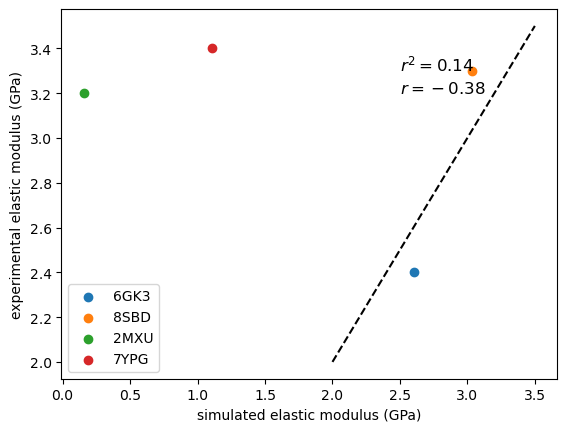

In [5]:
pdbIDs = [job.sp.pdbID for job in project if 'stress' in job.doc]
ran_pdbs = []
for i in ['2MXU', '7YPG', '6GK3', '8SBD', '2N0A']:
    if i in pdbIDs:
        ran_pdbs.append(i)
    else:
        print(f'{i} not found in project')

# [job.sp.pdbID in ['2MXU', '7YPG', '6GK3', '8SBD', '2N0A'] and not np.isnan(job.doc['elastic_modulus']) for job in project]
        
exp_values = [3.2, 3.4, 3.7, 3.2, 2.2] #'2MXU', '7YPG', '6GK3', '8SBD', '2N0A'

simulated = [job for job in project if job.sp.pdbID in ran_pdbs and not np.isnan(job.doc['elastic_modulus'])]

print([j.sp.pdbID for j in simulated])

exp_val, sim_val = [2.4, 3.3, 3.2, 3.4], []
for j, e in zip(simulated, exp_val):
    plt.scatter(j.doc['elastic_modulus']/1e9, e, label=j.sp.pdbID)
    sim_val.append(j.doc['elastic_modulus']/1e9)
plt.plot([2, 3.5], [2, 3.5], 'k--')

# Calculating r-squared value
correlation_matrix = np.corrcoef(sim_val, exp_val)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

# Calculating r value
r_value = correlation_xy

# Annotating the plot with r-squared and r values
plt.text(2.5, 3.3, f'$r^2 = {r_squared:.2f}$', fontsize=12)
plt.text(2.5, 3.2, f'$r = {r_value:.2f}$', fontsize=12)


plt.xlabel('simulated elastic modulus (GPa)')
plt.ylabel('experimental elastic modulus (GPa)')
plt.legend()
plt.show()
# plt.plot([job.doc['ultimate_tensile_strength']/1e6 for job in project if job.sp.pdbID in ran_pdbs], [], 'o', label='Tensile strength (MPa)')
# plt.xlabel('predicted ultimate tensile strength (MPa)')
# plt.ylabel('experimental ultimate tensile strength (MPa)')

In [8]:
x,y =0.10797326653431591, 55926260.3569958
print(y/x / 1e9)

0.5179639567468434


In [38]:
import scipy.stats
print(sim_val)
print(exp_val)

np.corrcoef([0,5], [1,6])
np.correlate(sim_val, exp_val)
scipy.stats.pearsonr(sim_val, exp_val)

[2.601216968910071, 3.036003193856221]
[2.4, 3.3]


PearsonRResult(statistic=1.0, pvalue=1.0)

In [20]:

{job.sp.pdbID:job.doc['elastic_modulus']/1e9 for job in project if job.sp.pdbID in ran_pdbs and not np.isnan(job.doc['elastic_modulus'])}

{'6GK3': 2.601216968910071, '8SBD': 3.036003193856221}

In [11]:
jobs = project.find_jobs({'pdbID': '2NOA'})

for j in jobs:
    print(j)
    print(j.doc)
    print(j.sp)
    print(j.doc['elastic_modulus'])
    print(j.doc['ultimate_tensile_strength'])
